### Preliminary steps.

In [24]:
# Import important libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Supress Warnings.

import warnings
warnings.filterwarnings('ignore')

In [26]:
%config IPCompleter.greedy=True # Autocomplete feature.

In [27]:
# # Jupyter Notebook will display all rows and columns this way. Use ctrl+/ to comment/un-comment.

from IPython.display import display
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
pd.options.display.precision = 2

In [28]:
# # Check the encoding of data. Use ctrl+/ to comment/un-comment.

# import chardet

# rawdata = open('Leads.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)
# print(result) # It's ascii with 100% confidence.

In [29]:
# Read csv data.

df = pd.read_csv('Leads.csv', encoding='utf-8')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


It can be seen that we have some columns with null values as well.

In [30]:
print(len(df.drop_duplicates().index) == len(df.index)) # Check for duplicate rows.
df.columns.nunique() == len(df.columns) # Check for duplicate columns.

True


True

Hence, no duplicate rows or columns.<br> <b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>
# 1. Data Cleaning + EDA.

In [31]:
round(df.isnull().sum(axis=0)/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We have large number of missing values in some columns, as much as 50%.<br><br>
Let's go through all the columns one by one.<br><br>
1. `Prospect ID` A unique ID with which the customer is identified. nothing significant here.<br><br>
2. `Lead Number` A lead number assigned to each lead procured.

In [32]:
df['Lead Number'].nunique() == len(df) # So, all the Lead Numbers are unique, as expected.

True

3. `Lead Origin` The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

In [33]:
f = {'Converted':['mean', 'size']}
df.groupby('Lead Origin').agg(f).sort_values(by=[('Converted', 'size')], ascending=False) # 0.39% null values.

Converted      
                             mean  size
Lead Origin                            
Landing Page Submission      0.36  4886
API                          0.31  3580
Lead Add Form                0.92   718
Lead Import                  0.24    55
Quick Add Form               1.00     1

In [34]:
dummy = pd.get_dummies(df['Lead Origin'], prefix='LeadOrigin')
dummy.drop(['LeadOrigin_Quick Add Form'], axis=1, inplace=True) # dropping one column to remove redundancy.
df = pd.concat([df, dummy], axis=1)
df.drop('Lead Origin', axis=1, inplace=True)

4. `Lead Source` The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc. <font color='red'> # has 0.39% null values.

In [35]:
df.groupby('Lead Source').agg(f).sort_values(by=[('Converted', 'size')], ascending=False) # 0.39% null values.

Converted      
                       mean  size
Lead Source                      
Google                 0.40  2868
Direct Traffic         0.32  2543
Olark Chat             0.26  1755
Organic Search         0.38  1154
Reference              0.92   534
Welingak Website       0.99   142
Referral Sites         0.25   125
Facebook               0.24    55
bing                   0.17     6
google                 0.00     5
Click2call             0.75     4
Press_Release          0.00     2
Social Media           0.50     2
Live Chat              1.00     2
WeLearn                1.00     1
Pay per Click Ads      0.00     1
NC_EDM                 1.00     1
blog                   0.00     1
testone                0.00     1
welearnblog_Home       0.00     1
youtubechannel         0.00     1

In [36]:
# creating a dictionary with keys as the old categories, and values as the new categories
lead_source = {'google':'Search Engines', 'Google':'Search Engines', 'bing':'Search Engines', 'Facebook':'Social Media',
              'Social Media':'Social Media', 'Olark Chat':'Olark Chat', 'Live Chat':'Olark Chat',
              'blog':'Other', 'Pay per Click Ads':'Other', 'WeLearn':'Other', 'Click2call':'Other',
              'welearnblog_Home':'Other', 'youtubechannel':'Other', 'testone':'Other', 'Press_Release':'Other',
              'NC_EDM':'Other', 'Reference':'Reference', 'Welingak Website':'Welingak Website',
              'Referral Sites':'Referral Sites', 'Direct Traffic':'Direct Traffic', 'Organic Search':'Organic Search'}

In [37]:
df['Lead Source'] = df['Lead Source'].map(lead_source)
df['Lead Source'].value_counts()

Search Engines      2879
Direct Traffic      2543
Olark Chat          1757
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Other                 13
Name: Lead Source, dtype: int64

In [38]:
dummy = pd.get_dummies(df['Lead Source'], prefix='LeadSource')
dummy.drop(['LeadSource_Other'], axis=1, inplace=True) # dropping one column to remove redundancy.
df = pd.concat([df, dummy], axis=1)
df.drop('Lead Source', axis=1, inplace=True)

5. `Do Not Email` An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

In [39]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [40]:
df['Do Not Email'] = df['Do Not Email'].apply(lambda x:1 if (x=='Yes') else 0)

In [41]:
df.groupby('Do Not Email')['Converted'].mean()*100

Do Not Email
0    40.48
1    16.08
Name: Converted, dtype: float64

Surprisingly, people who opt for do not for E-mails, also have converted, although very less.<br><br>
6. `Do Not Call` An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

In [42]:
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

This column has no variance. It's better to drop this column.

In [43]:
df.drop(labels='Do Not Call', axis=1, inplace=True)
df.shape

(9240, 46)

7. `Converted` The target variable. Indicates whether a lead has been successfully converted or not.

In [44]:
df['Converted'].mean()

0.3853896103896104

We have a <b>38.5%</b> conversion in the data. This target variable is not very skewed.

8. `TotalVisits` The total number of visits made by the customer on the website.<font color='red'> # has 1.48% missing values.</font>

In [45]:
df['TotalVisits'].describe()

count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
max       251.00
Name: TotalVisits, dtype: float64

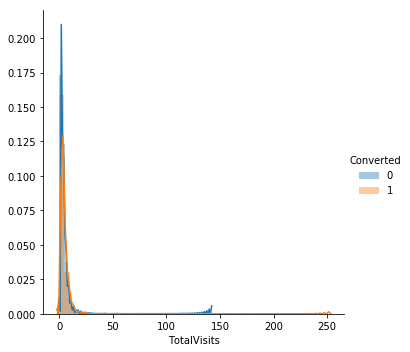

In [46]:
g = sns.FacetGrid(df, hue="Converted", size=5)
g = g.map(sns.distplot, "TotalVisits").add_legend()

9. `Total Time Spent on Website` The total time spent by the customer on the website.

In [47]:
df['Total Time Spent on Website'].describe()

count    9240.00
mean      487.70
std       548.02
min         0.00
25%        12.00
50%       248.00
75%       936.00
max      2272.00
Name: Total Time Spent on Website, dtype: float64

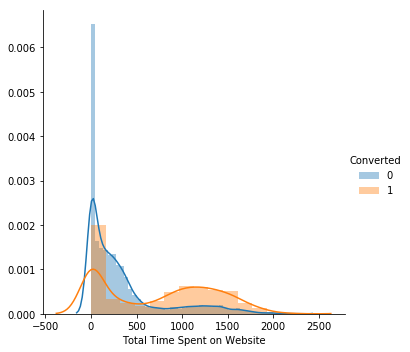

In [48]:
g = sns.FacetGrid(df, hue="Converted", size=5)
g = g.map(sns.distplot, "Total Time Spent on Website").add_legend()

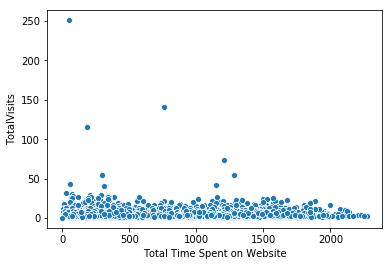

In [49]:
sns.scatterplot(x='Total Time Spent on Website', y='TotalVisits', data=df)

10. `Page Views Per Visit` Average number of pages on the website viewed during the visits. <font color='red'> # 1.48% missing values.

In [50]:
df['Page Views Per Visit'].describe()

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        55.00
Name: Page Views Per Visit, dtype: float64

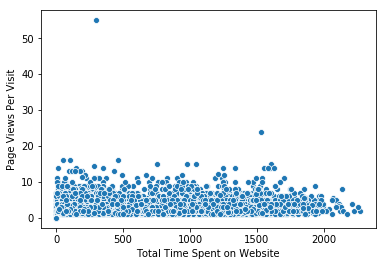

In [51]:
sns.scatterplot(x='Total Time Spent on Website', y='Page Views Per Visit', data=df)

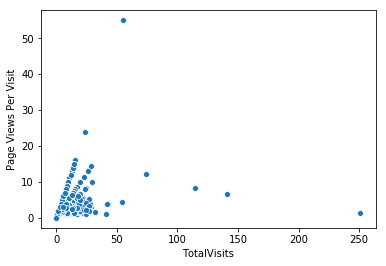

In [52]:
sns.scatterplot(x='TotalVisits', y='Page Views Per Visit', data=df)

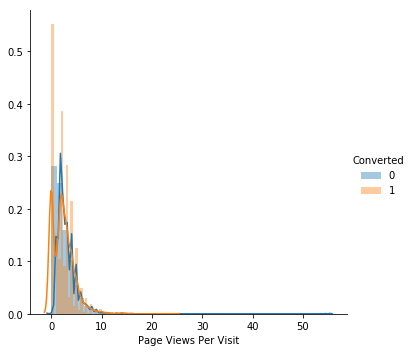

In [53]:
g = sns.FacetGrid(df, hue="Converted", size=5)
g = g.map(sns.distplot, "Page Views Per Visit").add_legend()

This does not seem like a variable that is able to distinguish between converted or not.<br><br>
From the scatter plots above, I have decided to remove rows with `TotalVisits` more than 50 as a method of treating outliers. We can also use the standard deviation method as demonstrated below.

In [54]:
threshold = 50
df = df[df['TotalVisits']<=threshold]
print(len(df)) # retained rows are 9100 when we use threshold 100 instead of 50.
len(df)/9240*100 # % of retained rows.

9097


98.45238095238096

In [55]:
df1 = df[(df.TotalVisits-df.TotalVisits.mean()) <= (3*df.TotalVisits.std())] # removing only the right-tailed observations.
print(len(df1))
print(len(df1)/9240*100) # % of retained rows.

import gc # garbage collection.
del [[df1]]
gc.collect()

8929
96.63419913419914


14626

We will use the first method.<br><br>
11. `Last Activity` Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc. <font color='red'> # 1.11% missing values.

In [56]:
df['Last Activity'].describe()

count             9097
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [57]:
df.groupby('Last Activity').agg(f).sort_values(by=[('Converted', 'size')], ascending=False)

Converted      
                                  mean  size
Last Activity                               
Email Opened                      0.36  3437
SMS Sent                          0.63  2737
Olark Chat Conversation           0.09   972
Page Visited on Website           0.24   635
Converted to Lead                 0.13   428
Email Bounced                     0.05   312
Email Link Clicked                0.27   267
Form Submitted on Website         0.24   116
Unreachable                       0.32    90
Unsubscribed                      0.26    61
Had a Phone Conversation          0.80    25
View in browser link Clicked      0.17     6
Approached upfront                1.00     5
Email Received                    1.00     2
Email Marked Spam                 1.00     2
Resubscribed to emails            1.00     1
Visited Booth in Tradeshow        0.00     1

In [58]:
dummy_la = pd.get_dummies(df['Last Activity'], prefix='LastActivity') # ,in dummy_la, la stands for last activity.
dummy_la.drop(['LastActivity_Visited Booth in Tradeshow'], axis=1, inplace=True) # dropping one column to remove redundancy.
# Not concating df and dummy_la now, as 1 more column `Last Notable Activity` (37th col) seems very similar to this column.
# We'll first plot correlation matrix to find out if they are infact similar

12. `Country` The country of the customer.<font color='red'> # has 26.63% missing values.

In [59]:
df['Country'].describe()

count      6773
unique       38
top       India
freq       6486
Name: Country, dtype: object

In [60]:
len(df[df['Country'].isnull()])

2324

In [61]:
df.groupby('Country').agg(f).sort_values(by=[('Converted', 'size')], ascending=False)[0:5]

Converted      
                          mean  size
Country                             
India                     0.37  6486
United States             0.26    69
United Arab Emirates      0.38    53
Singapore                 0.46    24
Saudi Arabia              0.19    21

I am deriving a new column `CntryIsIndia` and `CntryIsntIndia`. When both these columns have 0 value for the same row, it means `Country` column had a null value there.

In [62]:
df['CntryIsIndia'] = df['Country'].map(lambda x:1 if x=='India' else 0)
df['CntryIsntIndia'] = (df['Country'].fillna('Unknown')).map(lambda x:0 if (x=='India' or x=='Unknown') else 1)
df['CntryIsntIndia'].sum(), df['CntryIsIndia'].sum()

(287, 6486)

In [63]:
df.groupby(['CntryIsIndia'])['Converted'].mean()*100

CntryIsIndia
0    40.6
1    37.0
Name: Converted, dtype: float64

In [64]:
df.groupby(['CntryIsntIndia'])['Converted'].mean()*100

CntryIsntIndia
0    38.32
1    29.27
Name: Converted, dtype: float64

So, if the Country is India, we seem to have a little higher conversion rate. (37-29.3 ~ 8%)<br><br>
We can drop the `Country` column now.

In [65]:
df.drop('Country', axis=1, inplace=True)
df.shape

(9097, 47)

13. `Specialization`The industry domain in which the customer worked before. Includes the level 'Select' Specialization which means the customer had not selected this option while filling the form. <font color='red'> # has 15.56% missing values.

In [66]:
df['Specialization'].describe()

count       7666
unique        19
top       Select
freq        1871
Name: Specialization, dtype: object

`Select` is also as good as null value. So in this column we have, 1942/9240 ~ 21% + 15.56% = 36.56% missing values.

Converted      
                                       mean  size
Specialization                                   
Select                                 0.41  1871
Finance Management                     0.44   962
Human Resource Management              0.46   837
Marketing Management                   0.48   824
Operations Management                  0.47   500
Business Administration                0.44   399
IT Projects Management                 0.38   365
Supply Chain Management                0.43   345
Banking, Investment And Insurance      0.49   335
Media and Advertising                  0.42   202
Travel and Tourism                     0.35   202
International Business                 0.35   176
Healthcare Management                  0.49   157
Hospitality Management                 0.41   111
E-COMMERCE                             0.35   111
Retail Management                      0.34   100
Rural and Agribusiness                 0.43    72
E-Business                             0.37    57
Services Excellence                    0.28    40

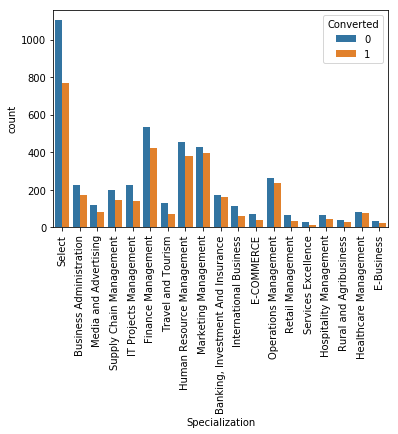

In [67]:
sns.countplot(data=df, x='Specialization', hue='Converted')
plt.xticks(rotation='vertical')

df.groupby('Specialization').agg(f).sort_values(by=[('Converted', 'size')], ascending=False)

Conversion rates vary roughly around 35% to 45%. Skeptical if this categorization will help in distinguishing between conversion.

In [68]:
dummy = pd.get_dummies(df['Specialization'], prefix='Spec') 
dummy.drop('Spec_Select', axis=1, inplace=True) # `Select` is dropped. No redundancy in dummies now.
df = pd.concat([df, dummy], axis=1)
df.drop('Specialization', axis=1, inplace=True)

When all the dummy columns has 0 values, it represents a null value or `Select` option.<br><br>
14. `How did you hear about X Education` The source from which the customer heard about X Education. <font color='red'># has 29.11% missing values.

In [69]:
df['How did you hear about X Education'].describe()

count       6899
unique        10
top       Select
freq        4912
Name: How did you hear about X Education, dtype: object

Same case as `Specializaion`. Has Select as an entry, which is as good as null. (5043/9240 ~ 54.6%). So we have in total 54.6 + 29.11% = 83.71% missing values.

In [70]:
df.groupby('How did you hear about X Education').agg(f).sort_values(by=[('Converted', 'size')], ascending=False)

Converted      
                                        mean  size
How did you hear about X Education                
Select                                  0.47  4912
Online Search                           0.42   808
Word Of Mouth                           0.44   348
Student of SomeSchool                   0.46   310
Other                                   0.40   186
Multiple Sources                        0.37   152
Advertisements                          0.47    68
Social Media                            0.41    66
Email                                   0.50    26
SMS                                     0.22    23

In [71]:
dummy = pd.get_dummies(df['How did you hear about X Education'], prefix='HearAbout')
dummy.drop('HearAbout_Select', axis=1, inplace=True)
df = pd.concat([df, dummy], axis=1)
df.drop('How did you hear about X Education', axis=1, inplace=True)

Other than SMS, we can see that all other channels have roughly 40 to 45% conversion rates. Skeptical if this categorization will help in distinguishing between conversion.<br><br>
15. `What is your current occupation` Indicates whether the customer is a student, umemployed or employed.<font color='red'> # has 29.11% missing values.

In [72]:
df['What is your current occupation'].fillna('Other', inplace=True) # imputing null values.

In [73]:
df['What is your current occupation'].value_counts()

Unemployed              5498
Other                   2696
Working Professional     679
Student                  207
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

It seems that 'Housewife' can fall under the 'Other' category and 'Businessman' can fall under the 'Working Professional' category.

In [74]:
df.replace('Housewife', 'Other', inplace=True)
df.replace('Businessman', 'Working Professional', inplace=True)

In [75]:
df.groupby('What is your current occupation').agg(f).sort_values(by=[('Converted', 'size')], ascending=False)

Converted      
                                     mean  size
What is your current occupation                
Unemployed                           0.43  5498
Other                                0.14  2705
Working Professional                 0.92   687
Student                              0.36   207

Unemployed entries are around 60.6%. And, `Working Professional` seems to have a very high conversion rate.

In [76]:
dummy = pd.get_dummies(df['What is your current occupation'], prefix='CurrentOcc')
dummy.drop('CurrentOcc_Other', axis=1, inplace=True)
df = pd.concat([df, dummy], axis=1)
df.drop('What is your current occupation', axis=1, inplace=True)

16. `What matters most to you in choosing a course` An option selected by the customer indicating what is their main motto behind doing this course.<font color='red'> # has 29.32% missing values.

In [77]:
df.groupby('What matters most to you in choosing a course').agg(f).sort_values(by=[('Converted', 'size')], ascending=False)

Converted      
                                                   mean  size
What matters most to you in choosing a course                
Better Career Prospects                            0.48  6396
Flexibility & Convenience                          1.00     1
Other                                              0.00     1

It is safe to assume that everyone is interested in this course for better career prospects. Hence this column will introduce no variance and it's better to drop it.

In [78]:
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

17. to 22. `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement` Indicating whether the customer had seen the ad in any of the listed items. 

In [79]:
(df['Search'].value_counts(normalize=True), 
df['Magazine'].value_counts(normalize=True), 
df['Newspaper Article'].value_counts(normalize=True),
df['X Education Forums'].value_counts(normalize=True),
df['Newspaper'].value_counts(normalize=True),
df['Digital Advertisement'].value_counts(normalize=True))

(No     9.98e-01
 Yes    1.54e-03
 Name: Search, dtype: float64, No    1.0
 Name: Magazine, dtype: float64, No     1.00e+00
 Yes    2.20e-04
 Name: Newspaper Article, dtype: float64, No     1.00e+00
 Yes    1.10e-04
 Name: X Education Forums, dtype: float64, No     1.00e+00
 Yes    1.10e-04
 Name: Newspaper, dtype: float64, No     1.00e+00
 Yes    4.40e-04
 Name: Digital Advertisement, dtype: float64)

These columns offer no variance. They can be deleted.

In [80]:
df.drop('Search', axis=1, inplace=True)
df.drop('Magazine', axis=1, inplace=True)
df.drop('Newspaper Article', axis=1, inplace=True)
df.drop('X Education Forums', axis=1, inplace=True)
df.drop('Newspaper', axis=1, inplace=True)
df.drop('Digital Advertisement', axis=1, inplace=True)

23. `Through Recommendations` Indicates whether the customer came in through recommendations.

In [81]:
df['Through Recommendations'].value_counts(normalize=True)

No     9.99e-01
Yes    7.69e-04
Name: Through Recommendations, dtype: float64

It is safe to delete this column as `No` values are around 99.9%.

In [82]:
df.drop('Through Recommendations', axis=1, inplace=True)

24. `Receive More Updates About Our Courses` Indicates whether the customer chose to receive more updates about the courses.

In [83]:
df['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [84]:
df.drop('Receive More Updates About Our Courses', axis=1, inplace=True) # No variance in column.

25. `Tags` Tags assigned to customers indicating the current status of the lead.<font color='red'> # has 36.29% missing values.</font>

In [85]:
df.groupby('Tags').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                                       mean  size
Tags                                                             
Lateral student                                    1.00e+00     3
Interested in Next batch                           1.00e+00     5
Closed by Horizzon                                 9.93e-01   301
Lost to EINS                                       9.77e-01   173
Will revert after reading the email                9.71e-01  2035
Busy                                               5.68e-01   185
Shall take in the next coming month                5.00e-01     2
Want to take admission but has financial problems  3.33e-01     6
in touch with EINS                                 2.50e-01    12
In confusion whether part time or DLP              2.00e-01     5
Still Thinking                                     1.67e-01     6
opp hangup                                         9.09e-02    33
Graduation in progress                             6.31e-02   111
Ringing                                            2.86e-02  1189
Interested  in full time MBA                       2.59e-02   116
Interested in other courses                        2.36e-02   508
switched off                                       1.67e-02   240
Diploma holder (Not Eligible)                      1.59e-02    63
invalid number                                     1.20e-02    83
Not doing further education                        6.94e-03   144
Already a student                                  6.45e-03   465
number not provided                                0.00e+00    26
Recognition issue (DEC approval)                   0.00e+00     1
University not recognized                          0.00e+00     2
Lost to Others                                     0.00e+00     7
wrong number given                                 0.00e+00    47

It seems that we cannot reduce the categories by bucketing, and this column has more than 35% missing values, therfore we can drop it.

In [86]:
df.drop('Tags', axis=1, inplace=True)

26. `Lead Quality` Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. <font color='red'> # has 55.69% missing values.

In [87]:
df.groupby('Lead Quality').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                       mean  size
Lead Quality                     
High in Relevance      0.94   597
Low in Relevance       0.82   556
Might be               0.76  1533
Not Sure               0.24  1085
Worst                  0.02   601

In [88]:
dummy = pd.get_dummies(df['Lead Quality'],prefix='LeadQuality') # no need to set drop_first=True. `Lead Quality` column has missing values.
                    # When all the dummy columns will have 0 value, it will represent a missing value.
df = pd.concat([df, dummy], axis=1)
df.drop('Lead Quality', axis=1, inplace=True)

27. `Update me on Supply Chain Content` Indicates whether the customer wants updates on the Supply Chain Content.

In [89]:
df['Update me on Supply Chain Content'].value_counts()

No    9097
Name: Update me on Supply Chain Content, dtype: int64

All values are `No`.This column will introduce no variance. It's better to delete this column. 

In [90]:
df.drop('Update me on Supply Chain Content', axis=1, inplace=True)

28. `Get updates on DM Content` Indicates whether the customer wants updates on the DM Content.

In [91]:
df['Get updates on DM Content'].value_counts()

No    9097
Name: Get updates on DM Content, dtype: int64

All values are `No`.This column will introduce no variance. It's better to delete this column. 

In [92]:
df.drop('Get updates on DM Content', axis=1, inplace=True)

29. `Lead Profile` A lead level assigned to each customer based on their profile.<font color='red'> # has 29.32% missing values.

In [93]:
df.groupby('Lead Profile').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                 mean  size
Lead Profile                               
Dual Specialization Student      1.00    20
Lateral Student                  1.00    21
Potential Lead                   0.78  1559
Select                           0.40  4076
Other Leads                      0.37   482
Student of SomeSchool            0.03   240

In [94]:
dummy = pd.get_dummies(df['Lead Profile'], prefix='LeadProfile')
dummy.drop('LeadProfile_Select', axis=1, inplace=True)
df = pd.concat([df, dummy], axis=1)
df.drop('Lead Profile', axis=1, inplace=True)

30. `City` City of the Customer. <font color='red'> # has 15.37% missing values.

In [95]:
df.groupby('City').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                 mean  size
City                                       
Select                           0.48  2181
Thane & Outskirts                0.45   745
Other Cities of Maharashtra      0.44   447
Other Metro Cities               0.41   377
Mumbai                           0.40  3175
Other Cities                     0.40   679
Tier II Cities                   0.34    74

In [96]:
dummy = pd.get_dummies(df['City'])
dummy.drop('Select', axis=1, inplace=True)
df = pd.concat([df, dummy], axis=1)

In [97]:
df.drop('City', axis=1, inplace=True)

31. to 34. `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score` An index and score assigned to each customer based on their activity and their profile. <font color='red'> # has 45.65% missing values.

In [98]:
col_list_index = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']
col_list_score = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score']
print(df[col_list_index].describe())
df[col_list_score].describe()

       Asymmetrique Activity Index Asymmetrique Profile Index
count                         4933                       4933
unique                           3                          3
top                      02.Medium                  02.Medium
freq                          3752                       2747


,Asymmetrique Activity Score,Asymmetrique Profile Score
count,4933.00,4933.00
mean,14.31,16.34
std,1.39,1.80
min,7.00,11.00
25%,14.00,15.00
50%,14.00,16.00
75%,15.00,18.00
max,18.00,20.00


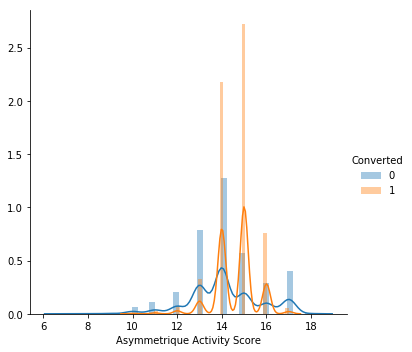

In [99]:
g = sns.FacetGrid(df, hue="Converted", size=5)
g = g.map(sns.distplot, col_list_score[0]).add_legend()

A score of 14, 15 and 16 seems to have higher conversion rate than rest of the scores. Let's derive a categorical column out of it.

In [100]:
df['AsymActScore>13'] = df['Asymmetrique Activity Score'].map(lambda x:1 if x>13 else 0)

In [101]:
df.drop('Asymmetrique Activity Score', axis=1, inplace=True) # no longer required.

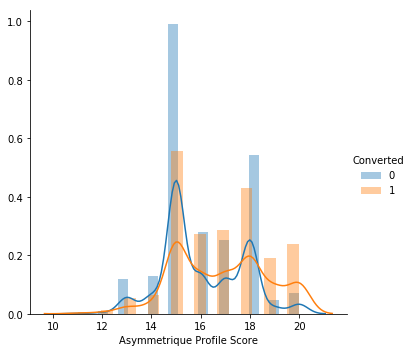

In [102]:
g = sns.FacetGrid(df, hue="Converted", size=5)
g = g.map(sns.distplot, col_list_score[1]).add_legend()

19 and 20 score seems to have a higher conversion that rest scores. 16 and 17 has slightly lower conversion rates. Also, it seems that higher scores are good. Since we have near about 45% missing values, the categorical column just derived will have 0 as value corresponding to the null values.

In [103]:
df['AsymProfScore>15'] = df['Asymmetrique Profile Score'].map(lambda x:1 if x>15 else 0)

In [104]:
df.drop('Asymmetrique Profile Score', axis=1, inplace=True) # no longer required.

In [105]:
df.groupby('Asymmetrique Activity Index').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                 mean  size
Asymmetrique Activity Index                
02.Medium                        0.42  3752
01.High                          0.30   819
03.Low                           0.09   362

In [106]:
dummy = pd.get_dummies(df['Asymmetrique Activity Index'])
df = pd.concat([df, dummy], axis=1)
df.rename(columns={'03.Low':'AsymActInd_Low', '02.Medium':'AsymActInd_Medium', '01.High':'AsymActInd_High'}, inplace=True)

In [107]:
df.drop('Asymmetrique Activity Index', axis=1, inplace=True)

In [108]:
df.groupby('Asymmetrique Profile Index').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                mean  size
Asymmetrique Profile Index                
03.Low                          0.48    31
01.High                         0.47  2155
02.Medium                       0.30  2747

In [109]:
dummy = pd.get_dummies(df['Asymmetrique Profile Index'])
df = pd.concat([df, dummy], axis=1)
df.rename(columns={'03.Low':'AsymActProf_Low','02.Medium':'AsymActProf_Medium','01.High':'AsymActProf_High'}, inplace=True)

In [110]:
df.drop('Asymmetrique Profile Index', axis=1, inplace=True)

35. `I agree to pay the amount through cheque` Indicates whether the customer has agreed to pay the amount through cheque or not.

In [111]:
df.groupby('I agree to pay the amount through cheque').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                              mean  size
I agree to pay the amount through cheque                
No                                            0.38  9097

No variation in this column. It's better to drop.

In [112]:
df.drop('I agree to pay the amount through cheque', axis=1, inplace=True)

36. `A free copy of Mastering The Interview` Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

In [113]:
df.groupby('A free copy of Mastering The Interview').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                            mean  size
A free copy of Mastering The Interview                
No                                          0.39  6212
Yes                                         0.36  2885

In [114]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map(
    lambda x:1 if x=='Yes' else 0)

Surprisingly, people who did not opt for a free copy, had a slightly higher conversion rate.

37. `Last Notable Activity` The last notable acitivity performed by the student.

In [115]:
df.groupby('Last Notable Activity').agg(f).sort_values(by=[('Converted', 'mean')], ascending=False)

Converted      
                                  mean  size
Last Notable Activity                       
Approached upfront                1.00     1
Email Marked Spam                 1.00     2
Email Received                    1.00     1
Resubscribed to emails            1.00     1
Had a Phone Conversation          0.93    14
SMS Sent                          0.69  2171
Unreachable                       0.69    32
Email Opened                      0.37  2827
Unsubscribed                      0.30    47
Page Visited on Website           0.29   314
Email Link Clicked                0.26   173
Modified                          0.21  3269
Email Bounced                     0.15    60
Olark Chat Conversation           0.14   183
Form Submitted on Website         0.00     1
View in browser link Clicked      0.00     1

`Last Activity` and `Last Notable Activity` seem awfully similar.

In [116]:
dummy_lna = pd.get_dummies(df['Last Notable Activity'],
                           prefix='LastNotableActivity') # ,in dummy_lna, lna stands for last notable activity.
dummy_lna.drop(['LastNotableActivity_View in browser link Clicked'],
                           axis=1, inplace=True) # dropping one column to remove redundancy.

In [117]:
df_corr = pd.concat([dummy_la, dummy_lna], axis=1) # df created to only plot correlation heatmap between the dummies.

In [118]:
df_corr.columns

Index(['LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Marked Spam', 'LastActivity_Email Opened',
       'LastActivity_Email Received', 'LastActivity_Form Submitted on Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website',
       'LastActivity_Resubscribed to emails', 'LastActivity_SMS Sent',
       'LastActivity_Unreachable', 'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'LastNotableActivity_Approached upfront',
       'LastNotableActivity_Email Bounced',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Marked Spam',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Email Received',
       'LastNotableActivity_Form Submitted on Website',
       'LastNotableActivity_Had a Phone

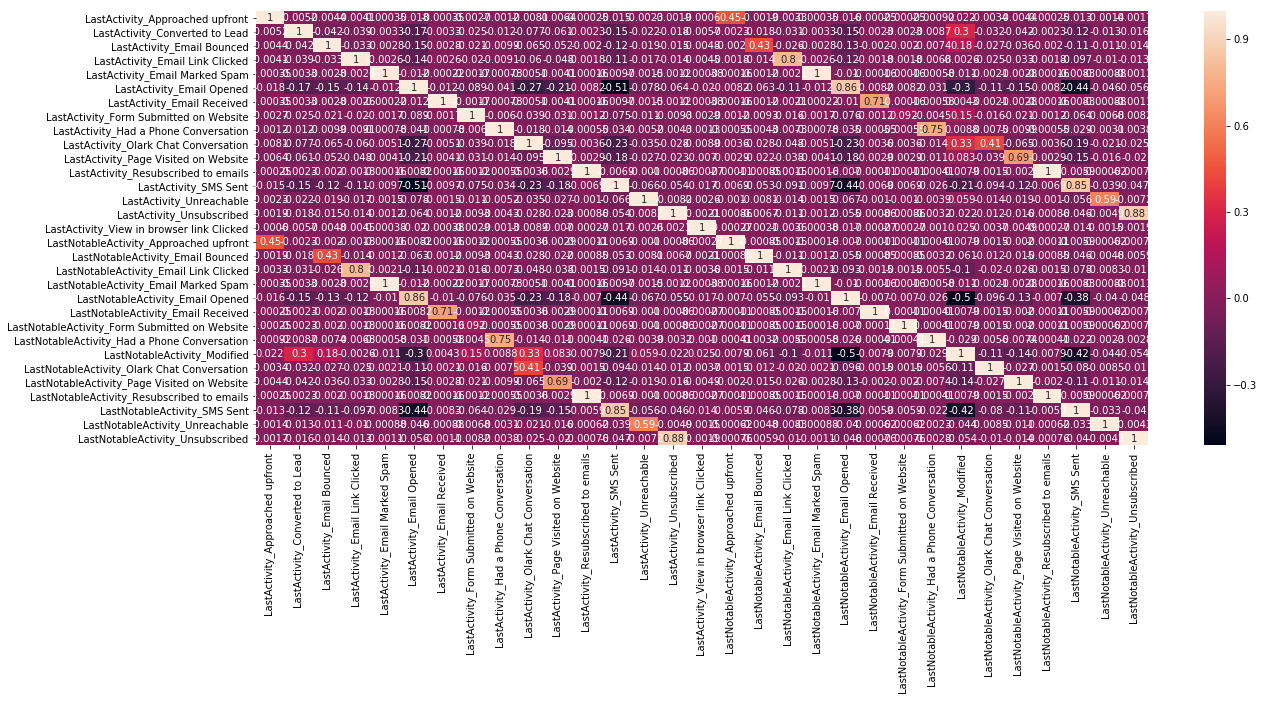

In [119]:
plt.figure(figsize = (20,8))        
sns.heatmap(df_corr.corr(),annot = True)

Check the other two lines <i>(sort of)</i> with values near `1, 0.86, 0.8, 0.71, 0.68, etc.` parallel to the diagonal. They represent that the dummy column from dummy_la and corresponding dummy from dummy_lna are perfectly correlated. Therfore, we can select only one column for creating dummy variables, either `Last Activity` or `Last Notable Activity`. I choose `Last Notable Activity` as it has no missing values.

In [120]:
df = pd.concat([df, dummy_lna], axis=1)

In [121]:
df.drop(['Last Activity', 'Last Notable Activity'], axis=1, inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9097 entries, 0 to 9239
Data columns (total 91 columns):
Prospect ID                                      9097 non-null object
Lead Number                                      9097 non-null int64
Do Not Email                                     9097 non-null int64
Converted                                        9097 non-null int64
TotalVisits                                      9097 non-null float64
Total Time Spent on Website                      9097 non-null int64
Page Views Per Visit                             9097 non-null float64
A free copy of Mastering The Interview           9097 non-null int64
LeadOrigin_API                                   9097 non-null int64
LeadOrigin_Landing Page Submission               9097 non-null int64
LeadOrigin_Lead Add Form                         9097 non-null int64
LeadOrigin_Lead Import                           9097 non-null int64
LeadSource_Direct Traffic                        9097 non-nu

<b>88</b> independent columns remain when we don't consider `Lead Number` and `Prospect ID`.

In [123]:
df.isnull().sum().sum() # Check if any null values remain.

0

In [124]:
len(df)/9240*100 # % of retained rows.

98.45238095238096

In [125]:
df.to_csv('df_cleaned.csv', index=False)